<a href="https://colab.research.google.com/github/shannontorcato/IvyHacks_Detect_Parkinsons/blob/main/Parkinsons_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get the fastai libraries and other important stuff: https://course.fast.ai/start_colab.html
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [2]:
#We Authenticate Colab To Use Google Drive For Data Storage And Retrieval
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Parkinsons'

Mounted at /content/gdrive


In [3]:
#We Check The Directory Path
base_dir

'/content/gdrive/My Drive/Parkinsons'

In [4]:
#We set the path to the dataset
path = root_dir + 'Parkinsons/dataset'
#We Check if the path is right
path

'/content/gdrive/My Drive/Parkinsons/dataset'

In [5]:
# A bunch of useful magic commands
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.vision import *
from fastai.metrics import *

In [7]:
import numpy as np
np.random.seed(7)

In [8]:
# Note that we are loading the images in the size of 128x128
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid='test', size=128, bs=8).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

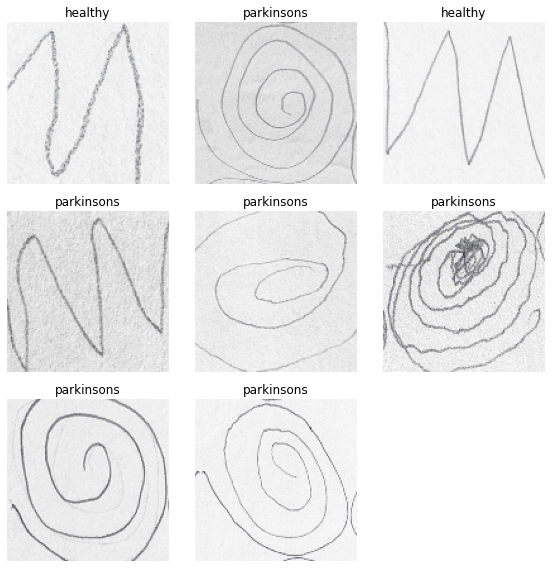

In [10]:
data.show_batch(rows=3, figsize=(8,8))

In [11]:
data.classes

['healthy', 'parkinsons']

In [12]:
data.label_list

LabelLists;

Train: LabelList (144 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
healthy,healthy,healthy,healthy,healthy
Path: /content/gdrive/My Drive/Parkinsons/dataset;

Valid: LabelList (60 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
parkinsons,parkinsons,parkinsons,parkinsons,parkinsons
Path: /content/gdrive/My Drive/Parkinsons/dataset;

Test: None

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.389835,0.755552,0.700000,00:35
1,1.224414,0.924738,0.700000,00:02
2,1.206895,0.615462,0.850000,00:02
3,1.056472,0.347979,0.833333,00:02
4,0.943363,0.394761,0.816667,00:02


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

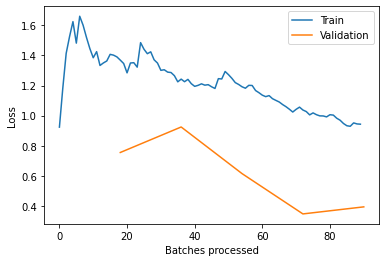

In [13]:
# Training with mixed precision
learn = cnn_learner(data, models.resnet34, metrics=accuracy).to_fp16()
learn.fit_one_cycle(5);
learn.recorder.plot_losses()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


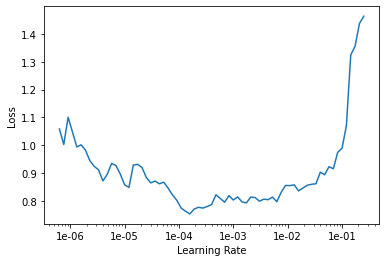

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.761334,0.467102,0.833333,00:02
1,0.775750,0.838045,0.733333,00:02
2,0.852275,0.811172,0.833333,00:02
3,0.830638,0.714600,0.800000,00:02
4,0.690524,0.652885,0.833333,00:02


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [16]:
# How about training the last group with a relatively lower learning rate?
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-04, 1e-04/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.608379,0.637105,0.850000,00:02
1,0.696113,0.456717,0.816667,00:02
2,0.680566,0.580622,0.816667,00:02
3,0.659025,0.482995,0.816667,00:02
4,0.688493,0.511445,0.833333,00:02


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

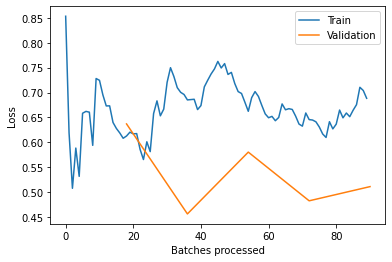

In [17]:
learn.recorder.plot_losses()

In [18]:
# Let's save the wait
learn.save('stage-1-rn34')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

True

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


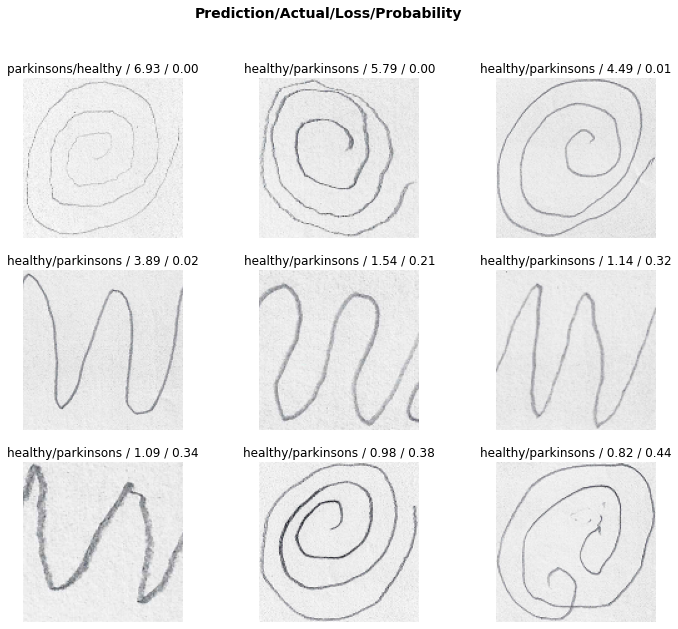

In [20]:
interp.plot_top_losses(9, figsize=(12,10), heatmap=False)

In [21]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid='test',
                                  size=256, bs=8).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet34, metrics=accuracy).to_fp16()
learn.load('stage-1-rn34') # Loading the weights of the previous model
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.052652,0.869744,0.833333,00:03
1,0.881339,0.748010,0.783333,00:03
2,0.803418,0.811997,0.750000,00:03
3,0.795438,0.605455,0.783333,00:03
4,0.726333,1.347839,0.716667,00:03


In [22]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy).to_fp16()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.140216,0.683239,0.766667,00:03
1,1.007258,1.052363,0.616667,00:03
2,0.914231,0.934946,0.716667,00:03
3,0.910098,0.782231,0.750000,00:03
4,0.764090,0.728354,0.800000,00:03


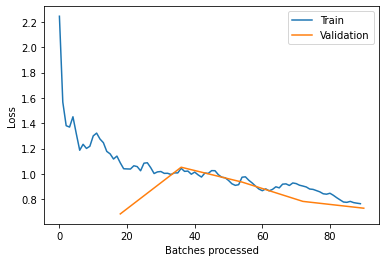

In [23]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


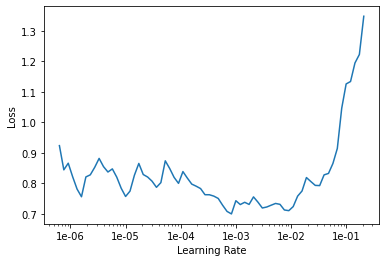

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-04, 1e-04/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.643328,0.762271,0.750000,00:03
1,0.589866,0.696213,0.766667,00:03
2,0.589907,0.648843,0.833333,00:03
3,0.542446,0.594348,0.816667,00:03
4,0.568174,0.567555,0.850000,00:03


In [27]:
learn.save('rn-34-unfreeze')

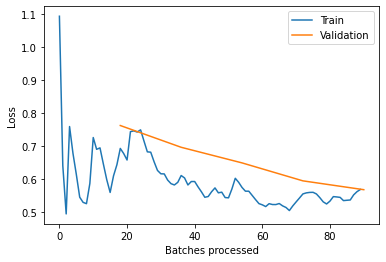

In [28]:
learn.recorder.plot_losses()

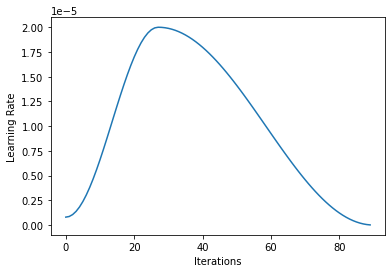

In [29]:
learn.recorder.plot_lr()

In [30]:
learn.fit_one_cycle(5, max_lr=slice(3*1e-05, 3*1e-05/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.430117,0.529936,0.800000,00:03
1,0.418906,0.427432,0.833333,00:03
2,0.453700,0.393392,0.866667,00:03
3,0.465852,0.401985,0.816667,00:03
4,0.462963,0.413420,0.816667,00:03


In [31]:
learn.save('stage-2-rn34-256-final')

In [32]:
learn.export('parkinson-predictor.pkl')

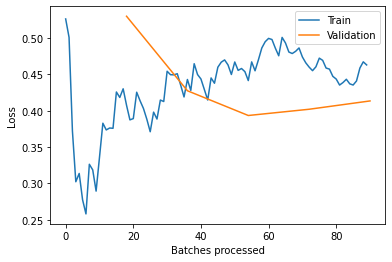

In [33]:
learn.recorder.plot_losses()

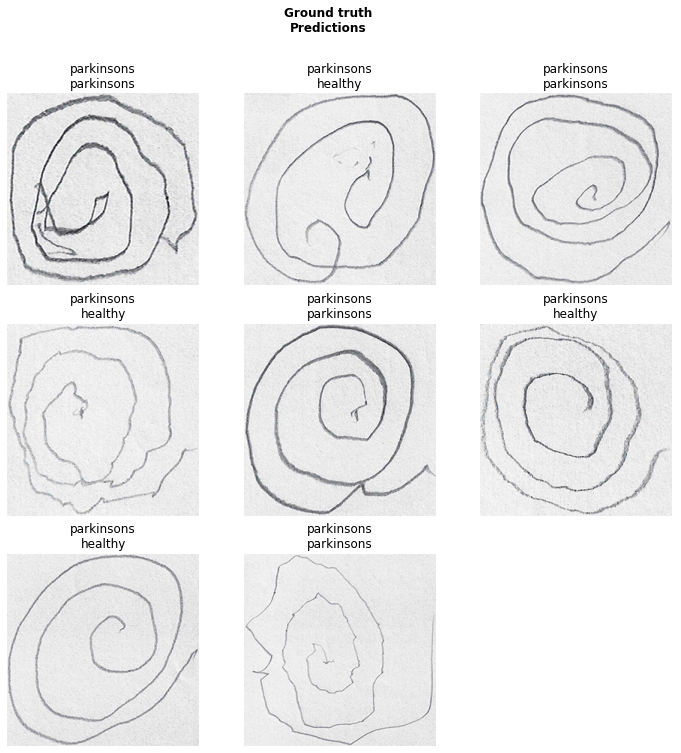

In [34]:
# Model's predictions on the test set
learn.show_results(rows=3)

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

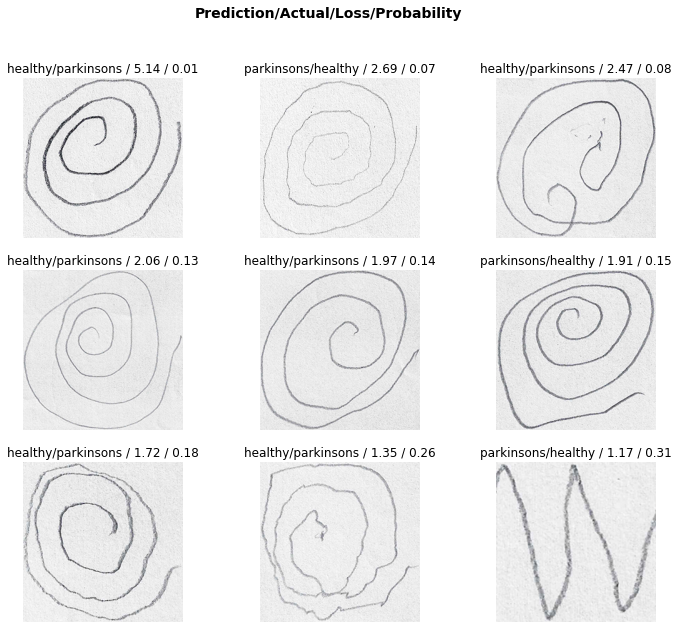

In [36]:
# Images for the loss is maximum
interp.plot_top_losses(9, figsize=(12,10), heatmap=False)

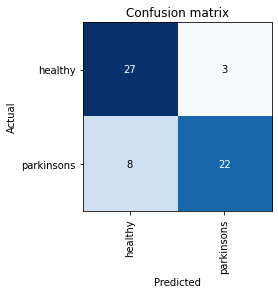

In [37]:
interp.plot_confusion_matrix()